In [16]:
# from comet_ml import Experiment
# experiment = Experiment(api_key="xktj4EX0zB8YcQ3BEaFwOQYpu")

In [17]:
import numpy as np
from keras.models import Sequential 
from keras.layers import Dense, Activation
from keras.regularizers import l2
from keras.utils import np_utils 

In [18]:
import os
import fnmatch

import pandas as pd

import sklearn.preprocessing as preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
import sklearn.datasets as ds

import matplotlib.pyplot as plt

import itertools


## Load Data

In [19]:
x, y = ds.load_iris(return_X_y = True)

## With Cross Validation

In [20]:
input_dim = x.shape[1]

In [21]:
batch_size = 16
nb_classes = 3
nb_epoch = 30

lmda = 0.05

In [22]:
def build_logistic_model(input_dim, output_dim):
    model = Sequential()
    model.add(Dense(output_dim, input_dim=input_dim,
                    kernel_regularizer=l2(lmda),
                    activation='softmax'))

    return model

In [23]:
model = None
model = build_logistic_model(input_dim, nb_classes)

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 3)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [25]:
def train_and_evaluate_model(model, x_train, y_train, x_test, y_test):
    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train,
                    batch_size=batch_size, epochs=nb_epoch,
                    verbose=1, validation_data=(x_test, y_test))
    score = model.evaluate(x_test, y_test, verbose=0)
    return score[1]

In [26]:
n_folds = 10

labels = y
data = x

labels = np_utils.to_categorical(labels, nb_classes) 

skf = StratifiedKFold(n_splits=n_folds, shuffle=True)
avg_acc = 0

y_true = []
y_pred = []

i=0

for train, test in skf.split(x,y):
    print("Running Fold", i+1, "/", n_folds)
    i+=1
    model = None # Clearing the NN.
    model = build_logistic_model(input_dim, nb_classes)
    
    std = np.std(data[train],0)
    mean = np.mean(data[train],0)
    
    x_train = (data[train]-mean)/std
    x_test = (data[test] - mean)/std        
    
    avg_acc += train_and_evaluate_model(model, x_train, labels[train], x_test, labels[test])
    
    # Predict the values from the validation dataset
    Y_pred = model.predict(x_test)
    # Convert predictions classes to one hot vectors 
    Y_pred_classes = np.argmax(Y_pred,axis = 1) 
    # Convert validation observations to one hot vectors
    Y_true = np.argmax(labels[test],axis = 1) 
    
    y_true.extend(Y_true)
    y_pred.extend(Y_pred_classes)

Running Fold 1 / 10
Train on 135 samples, validate on 15 samples
Epoch 1/30
135/135 [==============================] - 0s 3ms/step - loss: 1.1585 - acc: 0.5185 - val_loss: 0.8993 - val_acc: 0.6000
Epoch 2/30
135/135 [==============================] - 0s 385us/step - loss: 1.0910 - acc: 0.5407 - val_loss: 0.8473 - val_acc: 0.6000
Epoch 3/30
135/135 [==============================] - 0s 370us/step - loss: 1.0335 - acc: 0.5704 - val_loss: 0.8028 - val_acc: 0.6000
Epoch 4/30
135/135 [==============================] - 0s 392us/step - loss: 0.9826 - acc: 0.6296 - val_loss: 0.7640 - val_acc: 0.6000
Epoch 5/30
135/135 [==============================] - 0s 355us/step - loss: 0.9377 - acc: 0.6593 - val_loss: 0.7305 - val_acc: 0.7333
Epoch 6/30
135/135 [==============================] - 0s 370us/step - loss: 0.8989 - acc: 0.6593 - val_loss: 0.7025 - val_acc: 0.7333
Epoch 7/30
135/135 [==============================] - 0s 363us/step - loss: 0.8653 - acc: 0.6667 - val_loss: 0.6777 - val_acc: 0.8000

Running Fold 3 / 10
Train on 135 samples, validate on 15 samples
Epoch 1/30
135/135 [==============================] - 0s 3ms/step - loss: 1.3196 - acc: 0.2370 - val_loss: 1.2574 - val_acc: 0.1333
Epoch 2/30
135/135 [==============================] - 0s 266us/step - loss: 1.2318 - acc: 0.4667 - val_loss: 1.1748 - val_acc: 0.5333
Epoch 3/30
135/135 [==============================] - 0s 259us/step - loss: 1.1590 - acc: 0.5037 - val_loss: 1.1043 - val_acc: 0.6000
Epoch 4/30
135/135 [==============================] - 0s 222us/step - loss: 1.0958 - acc: 0.5259 - val_loss: 1.0451 - val_acc: 0.6000
Epoch 5/30
135/135 [==============================] - 0s 296us/step - loss: 1.0424 - acc: 0.5481 - val_loss: 0.9955 - val_acc: 0.6000
Epoch 6/30
135/135 [==============================] - 0s 304us/step - loss: 0.9971 - acc: 0.5778 - val_loss: 0.9550 - val_acc: 0.6000
Epoch 7/30
135/135 [==============================] - 0s 229us/step - loss: 0.9597 - acc: 0.6074 - val_loss: 0.9195 - val_acc: 0.7333

Running Fold 5 / 10
Train on 135 samples, validate on 15 samples
Epoch 1/30
135/135 [==============================] - 0s 3ms/step - loss: 1.5265 - acc: 0.3111 - val_loss: 1.5933 - val_acc: 0.3333
Epoch 2/30
135/135 [==============================] - 0s 252us/step - loss: 1.3941 - acc: 0.3407 - val_loss: 1.4677 - val_acc: 0.4000
Epoch 3/30
135/135 [==============================] - 0s 252us/step - loss: 1.2769 - acc: 0.3704 - val_loss: 1.3645 - val_acc: 0.4000
Epoch 4/30
135/135 [==============================] - 0s 229us/step - loss: 1.1813 - acc: 0.4148 - val_loss: 1.2779 - val_acc: 0.5333
Epoch 5/30
135/135 [==============================] - 0s 259us/step - loss: 1.1016 - acc: 0.4667 - val_loss: 1.2039 - val_acc: 0.5333
Epoch 6/30
135/135 [==============================] - 0s 229us/step - loss: 1.0345 - acc: 0.5111 - val_loss: 1.1387 - val_acc: 0.5333
Epoch 7/30
135/135 [==============================] - 0s 244us/step - loss: 0.9762 - acc: 0.6074 - val_loss: 1.0856 - val_acc: 0.6000

Running Fold 7 / 10
Train on 135 samples, validate on 15 samples
Epoch 1/30
135/135 [==============================] - 0s 3ms/step - loss: 1.0957 - acc: 0.4222 - val_loss: 1.1156 - val_acc: 0.3333
Epoch 2/30
135/135 [==============================] - 0s 252us/step - loss: 1.0391 - acc: 0.4889 - val_loss: 1.0489 - val_acc: 0.4000
Epoch 3/30
135/135 [==============================] - 0s 253us/step - loss: 0.9925 - acc: 0.5630 - val_loss: 0.9915 - val_acc: 0.4667
Epoch 4/30
135/135 [==============================] - 0s 267us/step - loss: 0.9522 - acc: 0.6667 - val_loss: 0.9413 - val_acc: 0.6667
Epoch 5/30
135/135 [==============================] - 0s 259us/step - loss: 0.9167 - acc: 0.6889 - val_loss: 0.8986 - val_acc: 0.7333
Epoch 6/30
135/135 [==============================] - 0s 252us/step - loss: 0.8866 - acc: 0.7111 - val_loss: 0.8634 - val_acc: 0.8000
Epoch 7/30
135/135 [==============================] - 0s 267us/step - loss: 0.8607 - acc: 0.7185 - val_loss: 0.8320 - val_acc: 0.8000

Running Fold 9 / 10
Train on 135 samples, validate on 15 samples
Epoch 1/30
135/135 [==============================] - 0s 4ms/step - loss: 1.5348 - acc: 0.2000 - val_loss: 1.4735 - val_acc: 0.3333
Epoch 2/30
135/135 [==============================] - 0s 252us/step - loss: 1.4069 - acc: 0.2519 - val_loss: 1.3446 - val_acc: 0.4000
Epoch 3/30
135/135 [==============================] - 0s 244us/step - loss: 1.3009 - acc: 0.3407 - val_loss: 1.2341 - val_acc: 0.4000
Epoch 4/30
135/135 [==============================] - 0s 289us/step - loss: 1.2115 - acc: 0.4370 - val_loss: 1.1411 - val_acc: 0.4667
Epoch 5/30
135/135 [==============================] - 0s 244us/step - loss: 1.1354 - acc: 0.5704 - val_loss: 1.0610 - val_acc: 0.6667
Epoch 6/30
135/135 [==============================] - 0s 215us/step - loss: 1.0706 - acc: 0.6667 - val_loss: 0.9966 - val_acc: 0.6667
Epoch 7/30
135/135 [==============================] - 0s 281us/step - loss: 1.0188 - acc: 0.7259 - val_loss: 0.9402 - val_acc: 0.8667

In [27]:
print("Average Accuracy: ", avg_acc/n_folds)

Average Accuracy:  0.8333333432674408


In [28]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

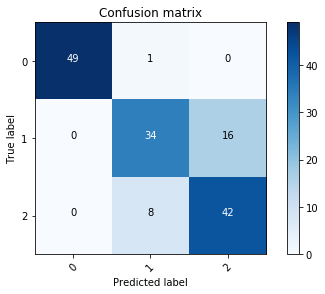

In [29]:
# compute the confusion matrix
confusion_mtx = confusion_matrix(np.array(y_true), np.array(y_pred)) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(3)) 